# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

Отправлять дз не нужно, нужно закоммитить в github. Сдается дз лично преподавателю на рубежном контроле (13 марта)

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Cчитываем данные, полученные в результате выполнения домашнего задания из курса введения, в `data frame` библиотеки `pandas`. Достаем координаты и конвертируем в массив `numpy`. Возможно, в собранном вами файле кодировка будет иной.

In [2]:
data_df = pd.read_csv("geopos_vk.csv", sep=",", header=0, encoding='utf-8')
data_df.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,36,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.485073e+09


In [3]:
x = data_df[['latitude', 'longitude']].values
print x

[[ 55.657941  37.751574]
 [ 53.202017  50.141377]
 [ 59.843376  30.23148 ]
 ..., 
 [ 55.76363   37.597046]
 [ 56.002732  37.209755]
 [ 47.225695  39.72997 ]]


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1 Баранчиков Максим	
2 Бекбулатов Рамзан	
3 Белозёров Михаил	
4 Бобылев Владислав	
5 Брызгалов Антон	
6 Будюк Алексей	
7 Валиуллин Альберт	
8 Валиуллин Артур	
9 Васильев Евгений	
10 Галицкий Игорь	
11 Горшков Сергей	
12 Гусев Вячеслав	
13 Дегтярев Роман	
14 Дементьев Максим	
15 Елохов Артур	
16 Ефимов Владислав	
17 Зайцев Александр	
18 Ильин Иван	
19 Имеев Мерген	
20 Камалбеков Тимур	
21 Капитонов Александр	
22 Каспарьянц Георгий	
23 Кафанов Олег	
24 Клейменов Андрей	
25 Козлов Иван	
26 Колмакова Татьяна	
27 Комов Евгений	
28 Крылов Иван	
29 Кузьмина Ирина	
30 Куклева Анна	
31 Курьянов Илья	
32 Лобанов Алексей	
33 Лозинский Иван	
34 Лузин Игорь	
35 Лукьянчиков Иван	
36 Неред Максим	
37 Новикова Анастасия	
38 Новичков Сергей	
39 Омаров Темирхан	
40 Павлова Анастасия	
41 Петренко Иван	
42 Пилюгин Вадим	
43 Плошкин Александр	
44 Полякова Вера	
45 Попкова Екатерина	
46 Преображенский Анатолий	
47 Пронин Сергей	
48 Пучкин Данила	
49 Рогачев Александр	
50 Руденко Дмитрий	
51 Рыбаков Владислав	
52 Санников Артём	
53 Скиба Глеб	
54 Страдомский Сергей	
55 Тескер Константин	
56 Трифанов Петр	
57 Хапкин Артем	
58 Хорошенький Илья	
59 Чокля Дмитрий	
60 Шмурак Денис	
61 Щербакова Елена	

In [5]:
N = 37 # put your index here

In [6]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
from sklearn.base import BaseEstimator, ClusterMixin
#from scipy.spatial import distance
from itertools import combinations
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import distance_metrics
import datetime

class Clustering(BaseEstimator, ClusterMixin):

    def __init__(self, k=2, lincage='average', metric='euclidean', **kwargs):
        """
        class constructor
        """
        self.lincage = lincage
        #if lincage not in ('single', 'complete', 'average'):
        #    self.lincage = 'average'
        self.metric = metric
        self.n_clusters = k
        
        return
        
    def fit(self, X, y=None):
        """
        compute model parameters
        """
        X = np.array(X)
        self.x_len = len(X) # x.shape[0]
        # структуры данных
        self.clusters = set(range(self.x_len))  # первоначальные метки кластеров, соответствубщие точкам
        self.labels = np.array(range(self.x_len))
        self.points_dist = {}  # словарь уже посчитанных расстояния между кластерами (i, j) 
        self.dist_matrix = distance_metrics()[self.metric](X, X)  # матрица попарных расстояний
        # переменные
        cluster_num_new = self.x_len  # номер следующего кластера после процедуры объединения
        self.num_iterations = self.x_len - self.n_clusters # требуемое кол-во итераций по объединению
        
        for it in xrange(self.num_iterations):  
            
            min_dist = 9000000000000/0.1 # просто большое число
            
            for a, b in combinations(self.clusters, 2): # смотрим все пары кластеров
                
                if (a < self.x_len) and (b < self.x_len): # если между данными точками то смотрим в матрице 
                    d = self.dist_matrix[a, b] 
                    
                elif (a, b) in self.points_dist:
                    d = self.points_dist[(a, b)]  # если уже считали, то берем из словаря готовый результат
                    
                else:
                    d = self.dist_between_clusters(a, b)
                    self.points_dist[(a, b)] = d
                    
                if d < min_dist:
                    
                    min_dist = d
                    A, B = a, b  # самые близкие кластеры
                    
            self.merge_clusters(A, B, cluster_num_new)
            cluster_num_new += 1
            
        return self

    
    def merge_clusters(self, A, B, cluster_num_new):
        """
        Слияние двух кластеров
        """
        self.labels[(self.labels == A) + (self.labels == B)] = cluster_num_new # присваиваем новый идентефикатор кластеру
        self.clusters.add(cluster_num_new) # добавляем новый кластер в список
        self.clusters -= set([A, B]) # удаляем из списка старые кластера 
    
    def dist_between_clusters(self, a, b):
        """
        Расстояние между кластерами
        a, b - номера кластеров
        """
        # смотрим точки в полученной паре кластеров 
        if self.lincage == 'single':
            
            dist_matrix = self.dist_matrix[np.where(self.labels == a)[0]][:, np.where(self.labels == b)[0]]
            res_dist = dist_matrix.min()
        
        elif self.lincage == 'complete':
            
            dist_matrix = self.dist_matrix[np.where(self.labels == a)[0]][:, np.where(self.labels == b)[0]]
            res_dist = dist_matrix.max()
        
        elif self.lincage == 'average':
            
            dist_matrix = self.dist_matrix[np.where(self.labels == a)[0]][:, np.where(self.labels == b)[0]]
            res_dist = np.average(dist_matrix)
            
        return res_dist
    
        
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels
    
    def fit_predict(self, x, y=None):
        
        self.fit(x, y)
        return self.predict(x)  

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

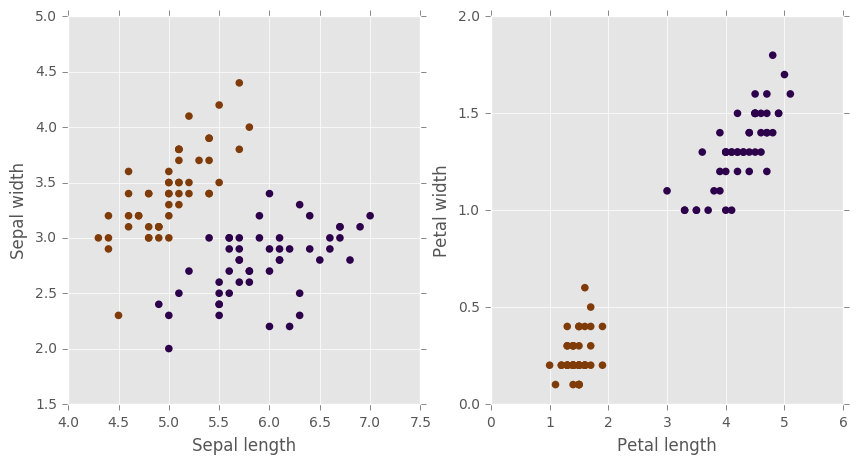

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
aggl = Clustering(n_clusters=2).fit(x_iris)
pred_iris = aggl.labels
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


Проверим работу алгоритма на датасете iris, сравнив с результатом AgglomerativeClustering()

In [7]:
y_iris_real = AgglomerativeClustering(n_clusters=2, linkage='average').fit_predict(x_iris)
y_iris_pred = Clustering(n_clusters=2).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris_real, y_iris_pred)

Adjusted Rand index for iris is: 1.00


Теперь проверим на части данных из vk для linkage=average и linkage=complete

In [8]:
y_data_real = AgglomerativeClustering(n_clusters=2, linkage='average').fit_predict(x[:150])
y_data_pred = Clustering(k=2).fit_predict(x[:150])
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_data_real, y_data_pred)

Adjusted Rand index for iris is: 1.00


In [9]:
y_data_real = AgglomerativeClustering(n_clusters=2, linkage='complete').fit_predict(x[:150])
y_data_pred = Clustering(k=2, linkage='complete').fit_predict(x[:150])
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_data_real, y_data_pred)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [10]:
from collections import Counter
from sklearn import preprocessing

def quality(X, y, metric='euclidean'):
    """
    Silhouette
    """
    X = np.array(X)
    le_obj = preprocessing.LabelEncoder() # преобразуем метки классов к 0,1,2...
    le_obj.fit(y)
    y = le_obj.fit_transform(y)
    
    cnt = Counter(y) # словарь содержащий частотности меток классов
    n_clusters = len(le_obj.classes_) # сколько меток
    sil_samples = np.zeros(len(X)) # значение критерия силуэт для каждой точки
    home_dist = np.zeros(len(X)) # среднее расстояния от точки до точек своего кластера
    all_dist =  np.full((n_clusters, len(X)), np.inf) # среднее расстояния от каждой точки до других кластеров
    all_dist_min = np.zeros(len(X)) # min расстояние из них
    dist_matrix = distance_metrics()[metric](X, X) # матрица попарных расстояний между точками
    
    for item in xrange(n_clusters):
    
        home_dist[y == item] = np.sum(dist_matrix[y == item][:,y == item], axis=1)
        home_dist[y == item] /= (cnt[item] - 1)  # среднее расстояние от каждой точки до точек из своего кластера
              
        for cl_out in xrange(n_clusters):
            
            if cl_out != item:
                
                all_dist[cl_out][y == item] = np.mean(dist_matrix[y == item][:,y == cl_out], axis=1)
                all_dist_min[y == item] = all_dist[:,y == item].min(axis=0)  # среднее расстояние от каждой точки до точек из ближайшего кластера
                
    home_dist[np.argwhere(np.isnan(home_dist))] = 0
    sil_samples = (all_dist_min - home_dist) / np.maximum(all_dist_min, home_dist)
    res_sil = np.average(sil_samples)
    
    return res_sil

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

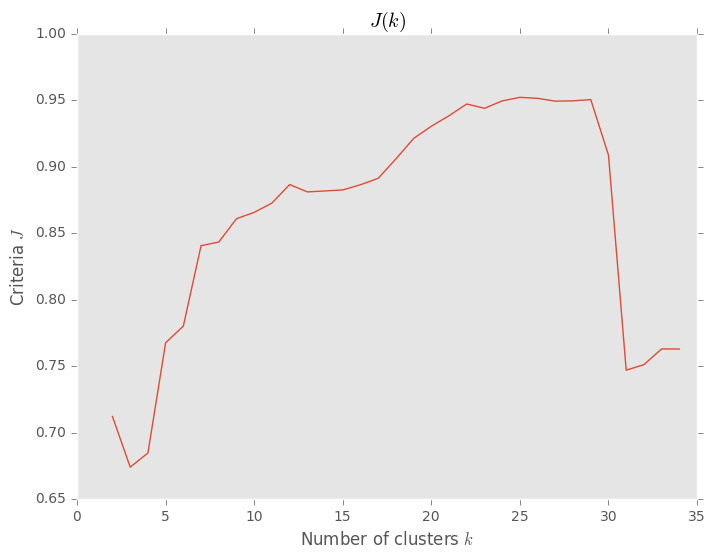

Best number of clusters is: 23


In [17]:
x = data_df[['latitude', 'longitude']].values

ks = range(2, 35)
criteria = np.zeros(len(ks))

optial_num = 0
best_ind = 0

for i, num in enumerate(ks):
    
    #cls = Clustering(k=num)
    cls = AgglomerativeClustering(n_clusters=num)
    y = cls.fit_predict(x)
    criteria[i] = quality(x, y)
    #print k
    if criteria[i] > optial_num:
        
        optial_num = criteria[i]
        best_ind = i
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

print "Best number of clusters is:", best_ind

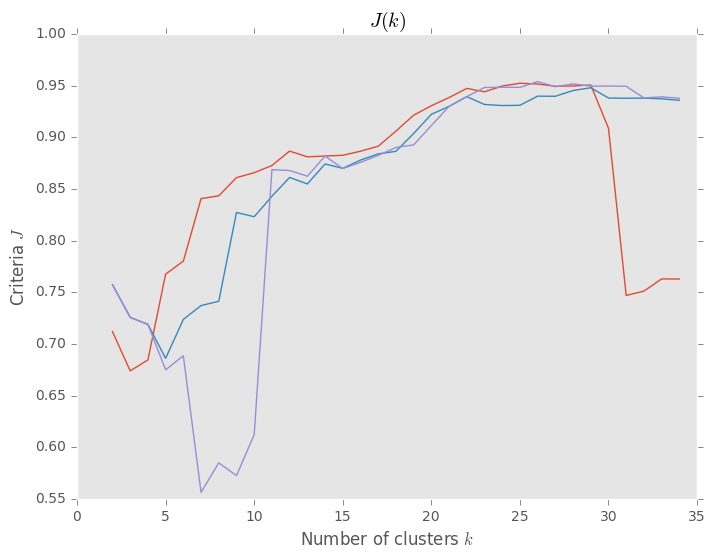

In [18]:
x = data_df[['latitude', 'longitude']].values

ks = range(2, 35)
criteria = np.zeros((3,len(ks)))

for i, num in enumerate(ks):
    
    for j, linc in enumerate(['ward', 'complete', 'average']):
        
        #cls = Clustering(k=num)
        cls = AgglomerativeClustering(n_clusters=num, linkage=linc)
        y = cls.fit_predict(x)
        criteria[j, i] = quality(x, y)
    #print k
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria[0])
pl.plot(ks, criteria[1])
pl.plot(ks, criteria[2])
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Мы получили оптимальное значение количества кластеров - 23.
Максимум метрики качества примерно одинаковый для всех linkage, будем использовать average.

Далее необходимо кластеризовать данные, используя выбранное количество кластеров, и визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время. 

In [21]:
num = 23
cls = Clustering(k=num)
y = cls.fit_predict(x)

In [26]:
counter1 = Counter(y)
counter1.most_common(23)

[(9973, 1806),
 (9958, 1273),
 (9963, 310),
 (9906, 190),
 (9935, 181),
 (9946, 175),
 (9932, 146),
 (9975, 115),
 (9972, 102),
 (9974, 101),
 (9969, 99),
 (9941, 93),
 (9970, 93),
 (9966, 59),
 (9976, 57),
 (9947, 51),
 (9944, 43),
 (9967, 41),
 (9884, 36),
 (9954, 18),
 (9795, 8),
 (5034, 2),
 (579, 1)]

Визуализируем кластеризацию на карте

In [28]:
k1 = 23
cls_std = AgglomerativeClustering(n_clusters=k, linkage='average')
y_std = cls_std.fit_predict(x)

In [29]:
counter_std = Counter(y_std)
counter_std.most_common(23)
# Видим, что результаты работы алгоритмов на данных из VK совпадают

[(3, 1806),
 (22, 1273),
 (10, 310),
 (20, 190),
 (17, 181),
 (13, 175),
 (12, 146),
 (2, 115),
 (8, 102),
 (1, 101),
 (4, 99),
 (18, 93),
 (21, 93),
 (9, 59),
 (0, 57),
 (5, 51),
 (19, 43),
 (7, 41),
 (16, 36),
 (6, 18),
 (15, 8),
 (14, 2),
 (11, 1)]

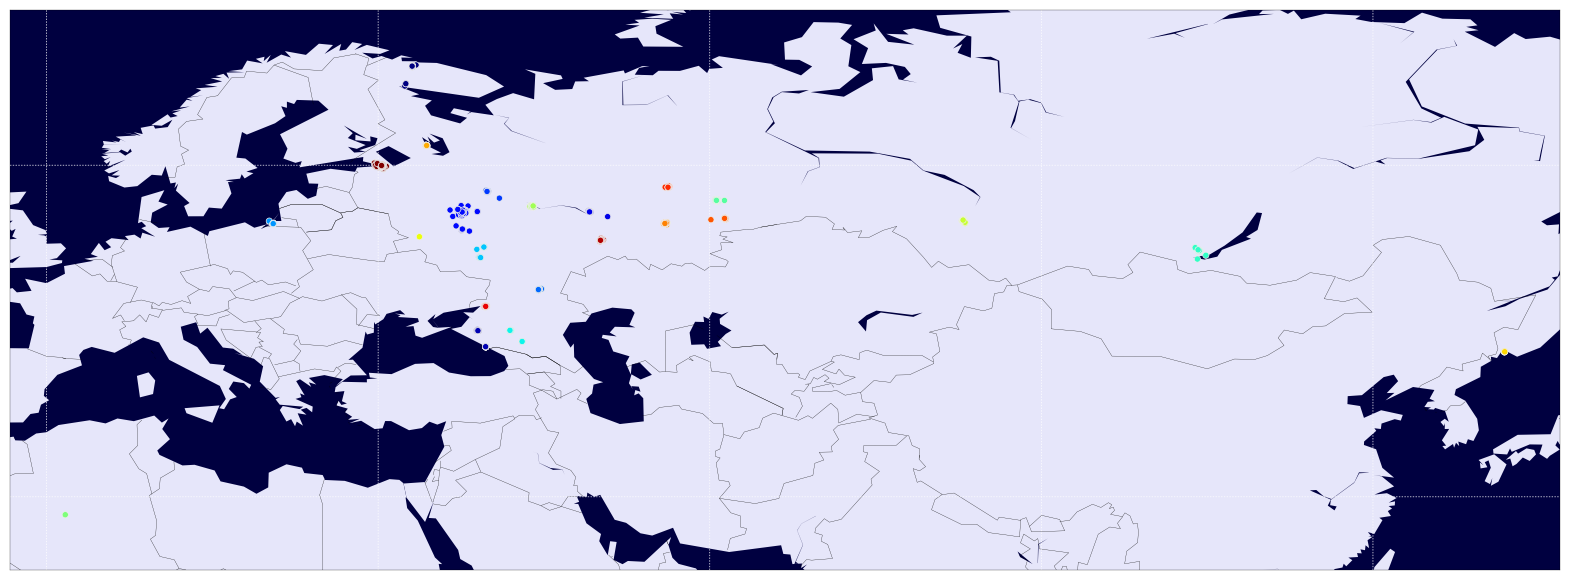

In [30]:
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=min(x[:, 0]) - 5, urcrnrlat=max(x[:, 0]) + 5, llcrnrlon=min(x[:, 1]) - 5, urcrnrlon=max(x[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x[:, 1], x[:,0], c=y_std, zorder=10)
    
pl.show()

Визуализируйте интересные участки (может быть это Москва) в приближенном виде. Постройте 3 (или более, в зависимости от данных, что вам самим бы хотелось увидеть ближе) увеличенных изображений карты с кластеризацией.

Москва (и ближайшие города)

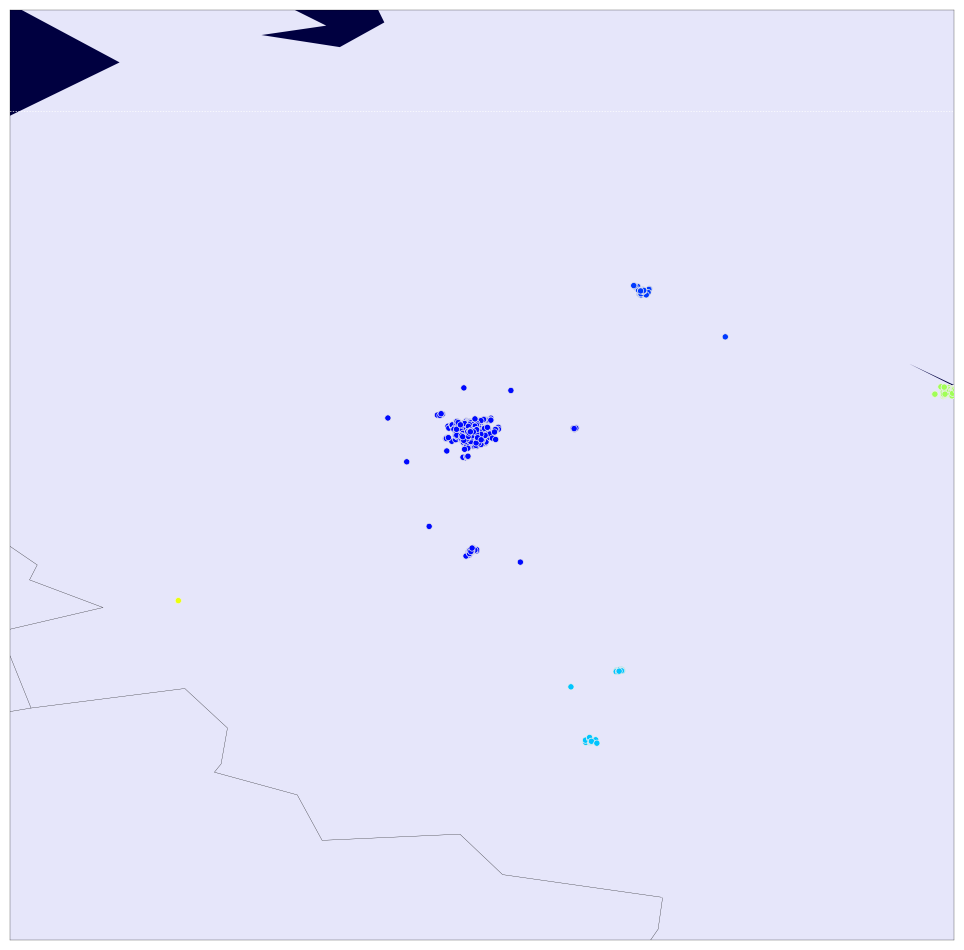

In [31]:
pl.figure(figsize=(20,12))

cluster = 3 # Москва (и ближайшие города)
x_clust = x[y_std == cluster]

m = bm.Basemap(projection='cyl', llcrnrlat=min(x_clust[:, 0]) - 5, urcrnrlat=max(x_clust[:, 0]) + 5, llcrnrlon=min(x_clust[:, 1]) - 5, urcrnrlon=max(x_clust[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x[:, 1], x[:,0], c = y_std, zorder=10)
    
pl.show()

Санкт-Петербург (и ближайшие города)

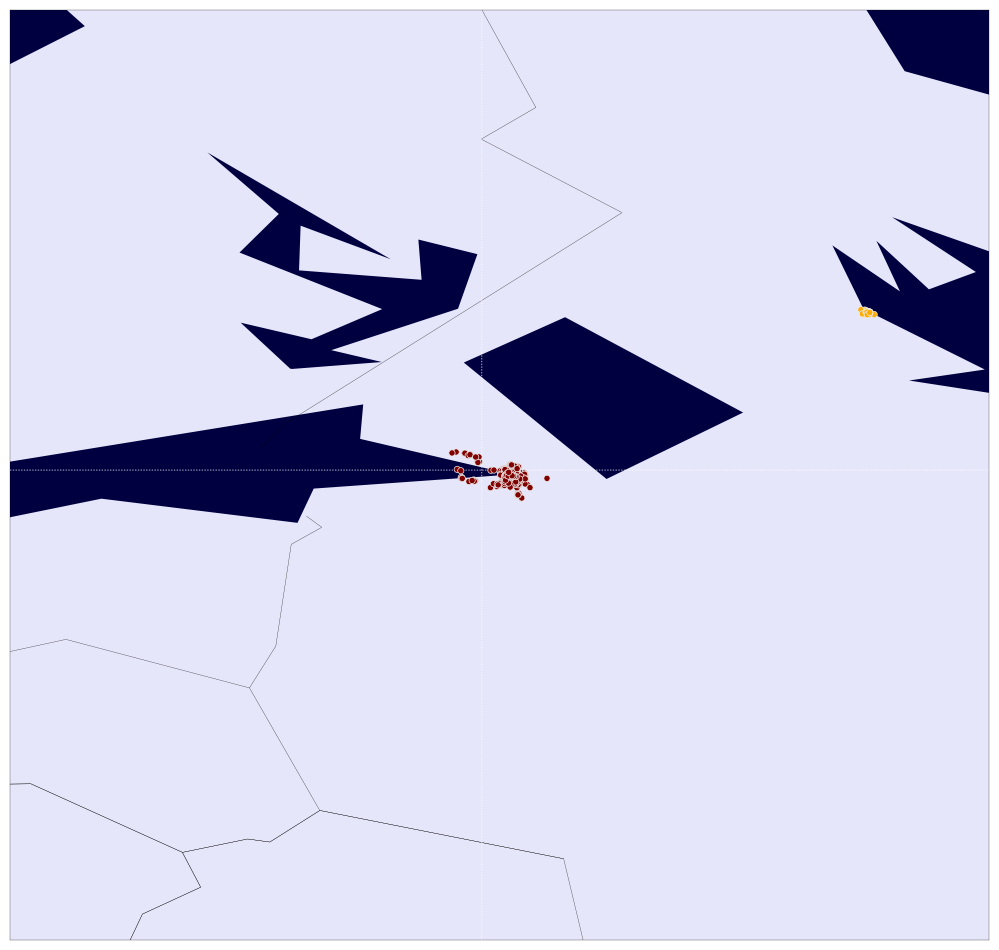

In [32]:
pl.figure(figsize=(20,12))

cluster = 22 # Санкт-Петербург (и ближайшие города)
x_clust = x[y_std == cluster]

m = bm.Basemap(projection='cyl', llcrnrlat=min(x_clust[:, 0]) - 5, urcrnrlat=max(x_clust[:, 0]) + 5, llcrnrlon=min(x_clust[:, 1]) - 5, urcrnrlon=max(x_clust[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x[:, 1], x[:,0], c = y_std, zorder=10)
    
pl.show()

Краснодарский Край

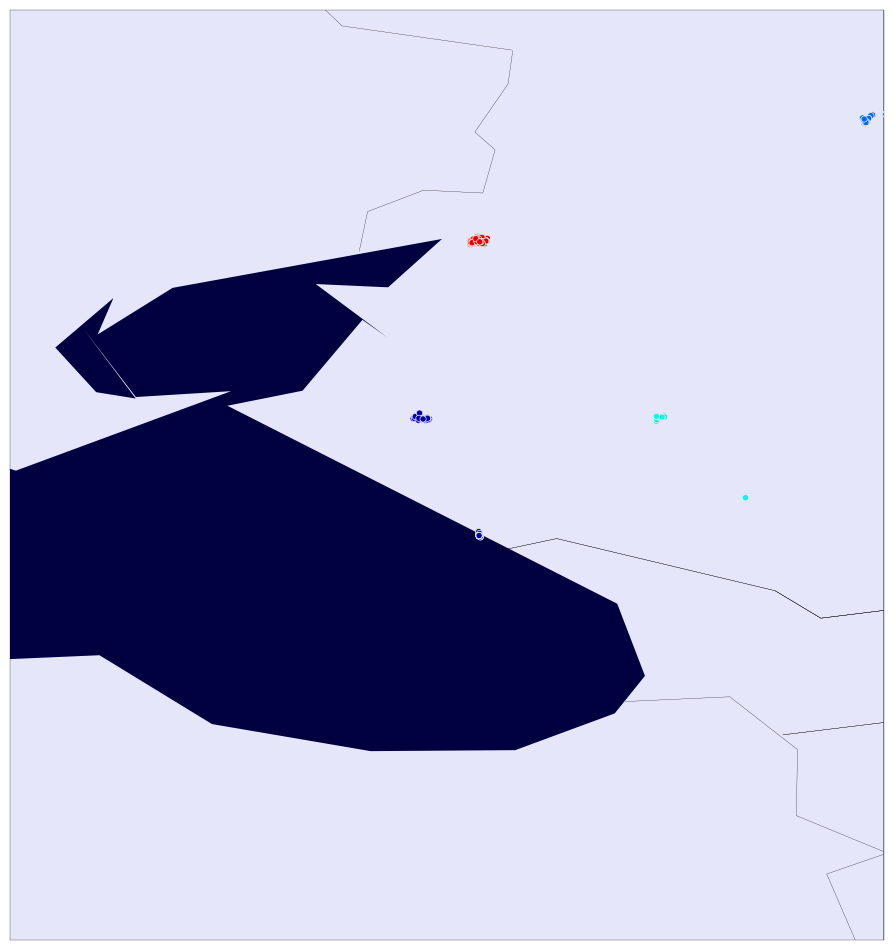

In [34]:
pl.figure(figsize=(20,12))

cluster = 1 # Краснодарский Край
x_clust = x[y_std == cluster]

m = bm.Basemap(projection='cyl', llcrnrlat=min(x_clust[:, 0]) - 5, urcrnrlat=max(x_clust[:, 0]) + 5, llcrnrlon=min(x_clust[:, 1]) - 5, urcrnrlon=max(x_clust[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x[:, 1], x[:,0], c = y_std, zorder=10)
    
pl.show()

Какой вывод можно сделать о качестве кластеризации?

Вывод: качество кластеризации на основе данных о широте и долготе довольно хорошее.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.